In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

In [63]:
df= pd.read_csv("Electric_Production.csv",parse_dates=[0],index_col=[0])
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


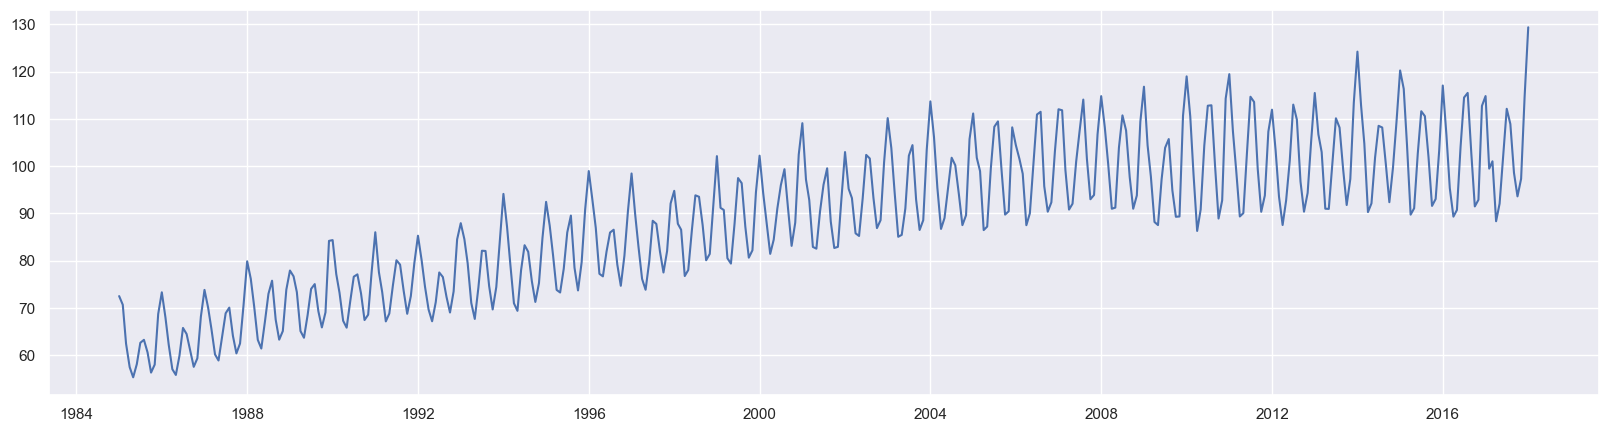

In [64]:
plt.figure(figsize=(20,5))
plt.plot(df)    

In [65]:
diffser= df.diff(1)

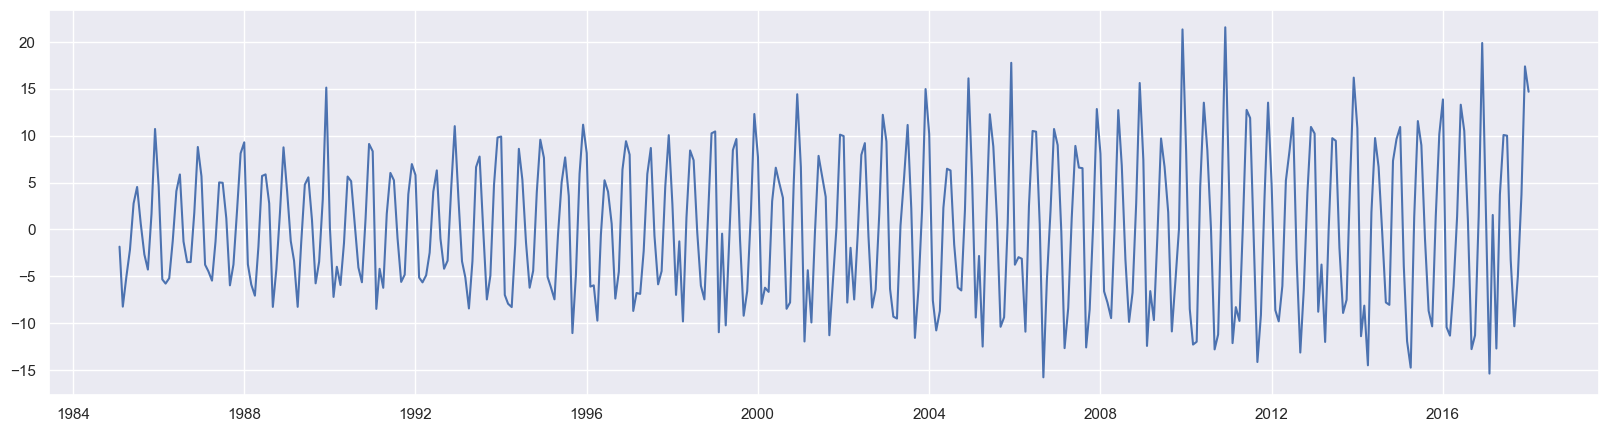

In [66]:
plt.figure(figsize=(20,5))
plt.plot(diffser)

In [67]:
x=[i%12 for i in range(len(diffser))]
y=df.values
coeff= np.polyfit(x,y,deg=5)
coeff

array([[ 1.54035233e-02],
       [-3.78274970e-01],
       [ 3.00499285e+00],
       [-7.60484896e+00],
       [-2.47231973e+00],
       [ 1.02180680e+02]])

In [68]:
fitted=[]
for i in range(len(x)):
    value=coeff[-1]
    for j in range(5):
        value =value+ ((x[i]**j)*coeff[5-j])
        print(value)
    fitted.append(value)

[204.36136088]
[204.36136088]
[204.36136088]
[204.36136088]
[204.36136088]
[204.36136088]
[201.88904115]
[194.28419219]
[197.28918504]
[196.91091007]
[204.36136088]
[199.41672141]
[168.99732558]
[193.03726836]
[186.98486885]
[204.36136088]
[196.94440168]
[128.50076106]
[209.63556794]
[178.9952954]
[204.36136088]
[194.47208195]
[72.79449862]
[265.11404086]
[168.27564863]
[204.36136088]
[191.99976221]
[1.87853826]
[377.5026442]
[141.08078819]
[204.36136088]
[189.52744248]
[-84.24712002]
[564.83133505]
[74.58697442]
[204.36136088]
[187.05512274]
[-185.58247621]
[845.1300705]
[-63.10813157]
[204.36136088]
[184.58280301]
[-302.12753031]
[1236.42880763]
[-312.98546795]
[204.36136088]
[182.11048328]
[-433.88228234]
[1756.75750352]
[-725.10457218]
[204.36136088]
[179.63816354]
[-580.84673228]
[2424.14611527]
[-1358.60358098]
[204.36136088]
[177.16584381]
[-743.02088013]
[3256.62459995]
[-2281.69923033]
[204.36136088]
[204.36136088]
[204.36136088]
[204.36136088]
[204.36136088]
[204.36136088]
[2

In [69]:
fitted

[array([204.36136088]),
 array([196.91091007]),
 array([186.98486885]),
 array([178.9952954]),
 array([168.27564863]),
 array([141.08078819]),
 array([74.58697442]),
 array([-63.10813157]),
 array([-312.98546795]),
 array([-725.10457218]),
 array([-1358.60358098]),
 array([-2281.69923033]),
 array([204.36136088]),
 array([196.91091007]),
 array([186.98486885]),
 array([178.9952954]),
 array([168.27564863]),
 array([141.08078819]),
 array([74.58697442]),
 array([-63.10813157]),
 array([-312.98546795]),
 array([-725.10457218]),
 array([-1358.60358098]),
 array([-2281.69923033]),
 array([204.36136088]),
 array([196.91091007]),
 array([186.98486885]),
 array([178.9952954]),
 array([168.27564863]),
 array([141.08078819]),
 array([74.58697442]),
 array([-63.10813157]),
 array([-312.98546795]),
 array([-725.10457218]),
 array([-1358.60358098]),
 array([-2281.69923033]),
 array([204.36136088]),
 array([196.91091007]),
 array([186.98486885]),
 array([178.9952954]),
 array([168.27564863]),
 arra

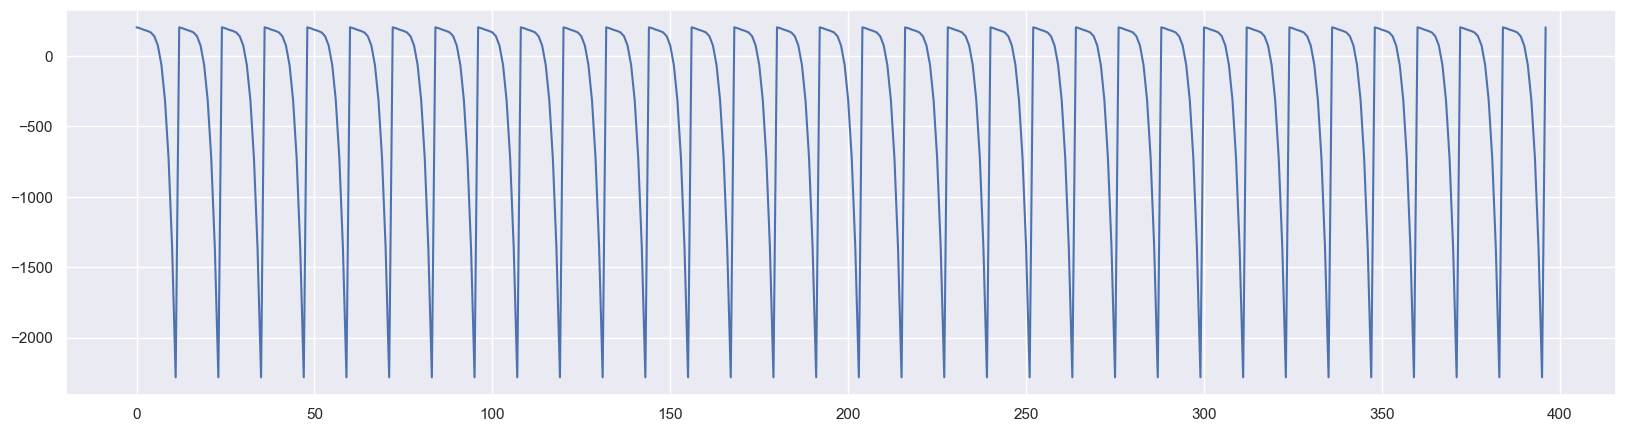

In [70]:
plt.figure(figsize=(20,5))
plt.plot(fitted)

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [72]:
ad=adfuller(df["IPG2211A2N"])
if(ad[1]>0.05):
    print("given model is not stationary")

given model is not stationary


[]

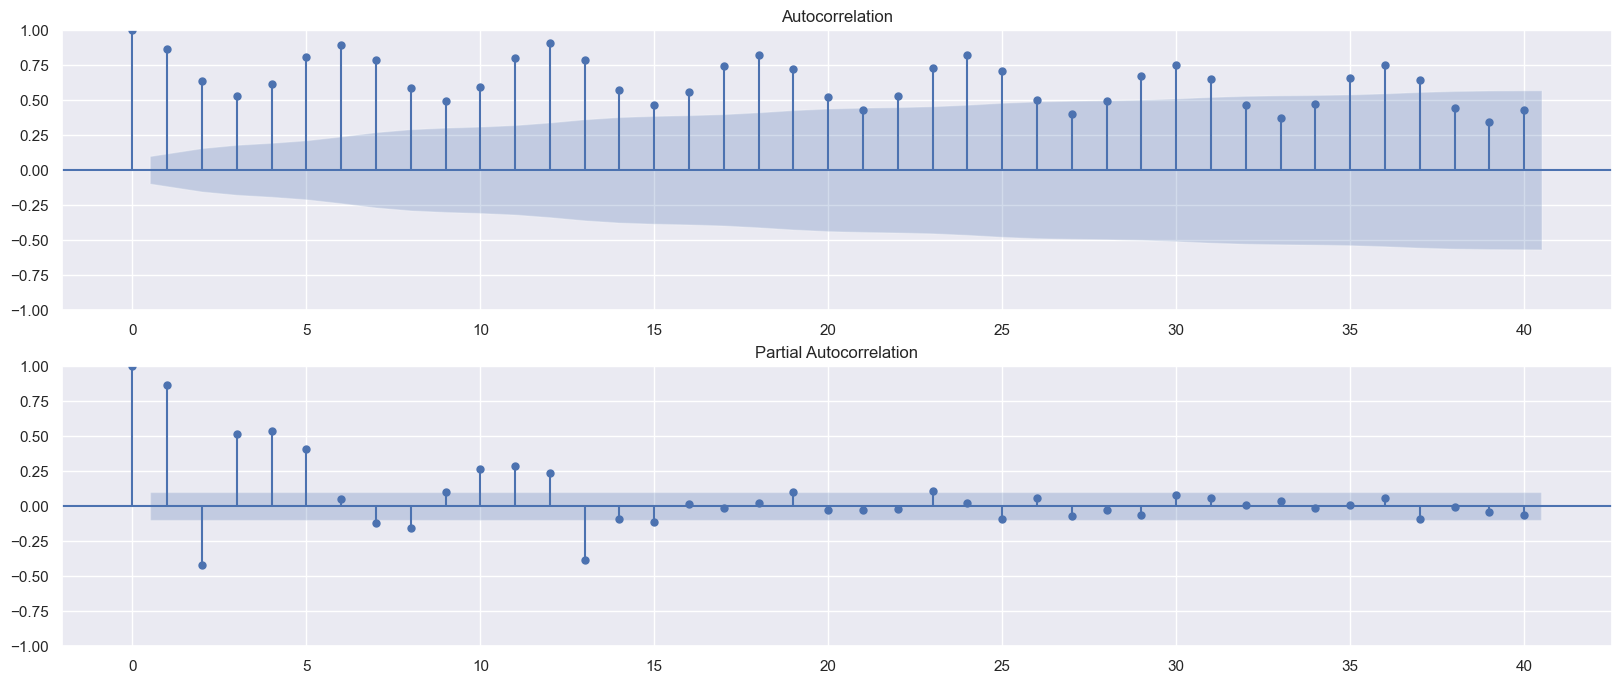

In [73]:
figure= plt.figure(figsize=(20,8))
ax1= figure.add_axes(211)
ax2= figure.add_axes(212)
plot_acf(df["IPG2211A2N"],lags=40,ax=ax1)
plot_pacf(df["IPG2211A2N"],lags=40,ax=ax2)
plt.plot()

In [74]:
model= ARIMA(df["IPG2211A2N"],order=(2,1,2))
res= model.fit()
pred= res.predict()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


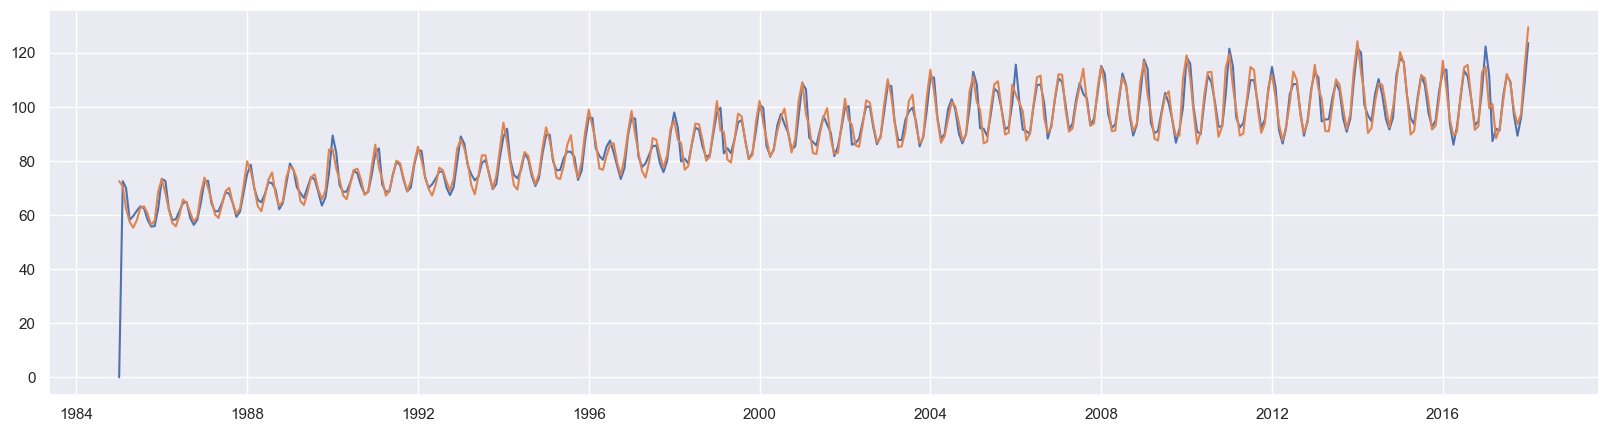

In [75]:
plt.figure(figsize=(20,5))
plt.plot(pred)
plt.plot(df["IPG2211A2N"])

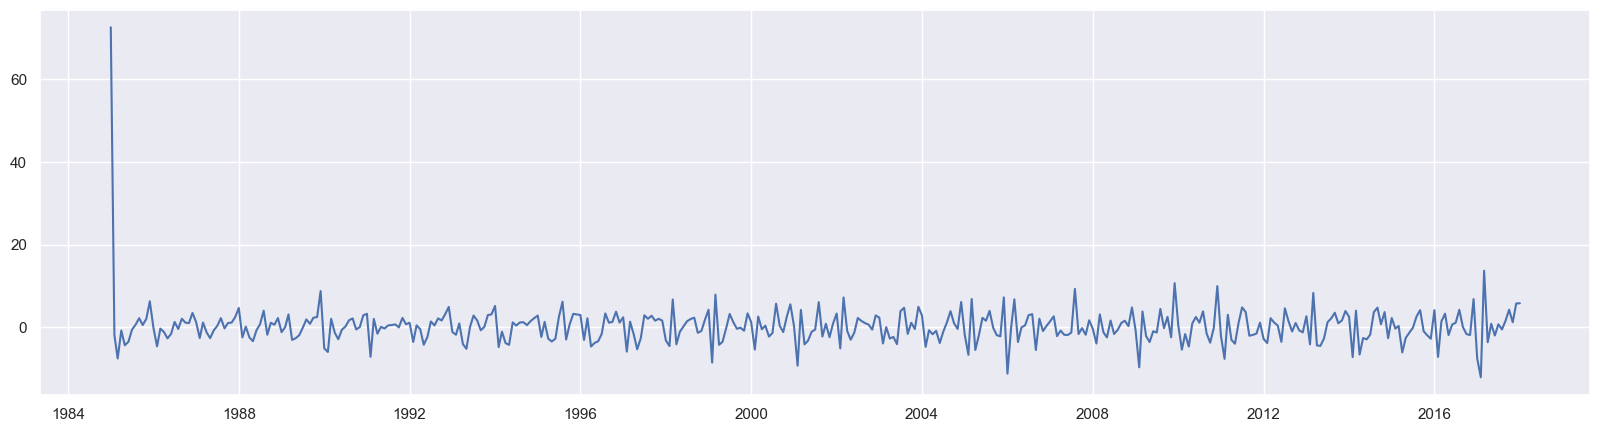

In [76]:
plt.figure(figsize=(20,5))
plt.plot(res.resid)

In [77]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1046.398
Date:                Tue, 02 Apr 2024   AIC                           2102.796
Time:                        22:48:34   BIC                           2122.703
Sample:                    01-01-1985   HQIC                          2110.683
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.002    546.444      0.000       0.996       1.003
ar.L2         -0.9994      0.001   -896.118      0.000      -1.002      -0.997
ma.L1         -1.0430      0.017    -61.357      0.000      -1.076      -1.010
ma.L2          0.9745      0.018     55.508      0.000       0.940       1.009
sigma2        11.2954      0.638     17.714      0.000      10.046      12.545
===================================================================================
Ljung-Box (L1) (Q):                   7.72   Jarque-Bera (JB):                25.75
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
model2= SARIMAX(df["IPG2211A2N"],order=(2,1,2),seasonal_order=(2,1,2,12))
res2=model2.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30829D+00    |proj g|=  1.07501D-01

At iterate    5    f=  2.23043D+00    |proj g|=  3.50001D-02

At iterate   10    f=  2.21965D+00    |proj g|=  1.39414D-02

At iterate   15    f=  2.21189D+00    |proj g|=  2.17983D-02

At iterate   20    f=  2.21140D+00    |proj g|=  2.38427D-03

At iterate   25    f=  2.21068D+00    |proj g|=  1.44129D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     29     32      1     0     0   

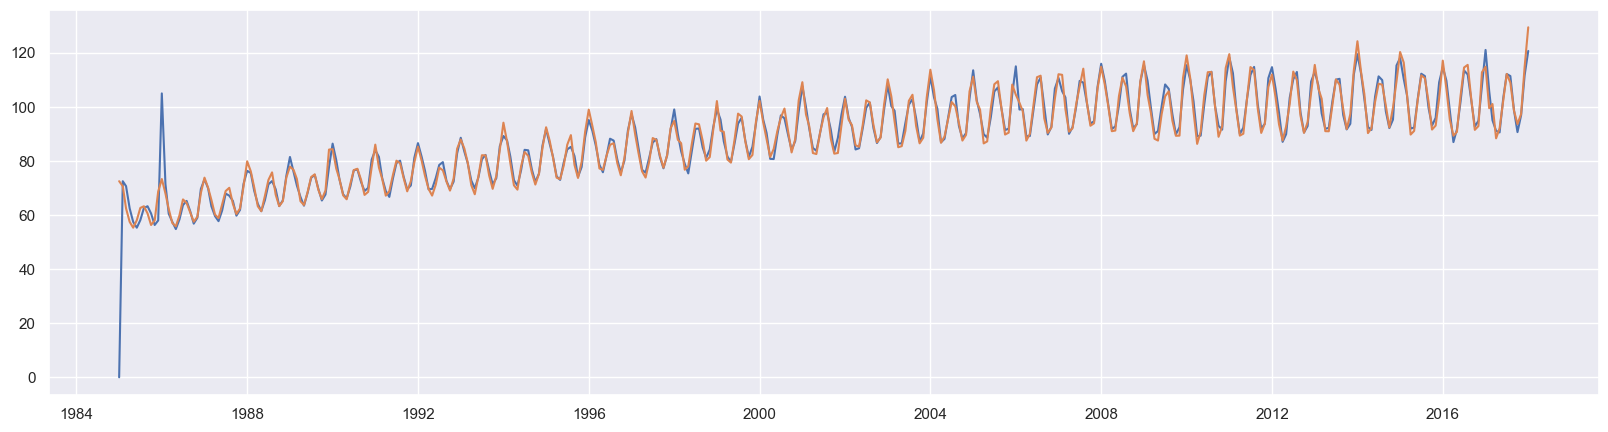

In [80]:
pred2= res2.predict()
plt.figure(figsize=(20,5))
plt.plot(pred2)
plt.plot(df["IPG2211A2N"])

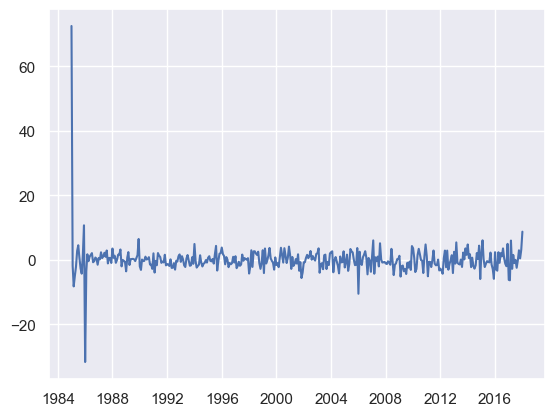

In [81]:
plt.plot(res2.resid)

In [82]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -877.639
Date:                            Tue, 02 Apr 2024   AIC                           1773.277
Time:                                    22:52:42   BIC                           1808.833
Sample:                                01-01-1985   HQIC                          1787.380
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0642      0.694      0.093      0.926      -1.296       1.424
ar.L2          0.1670      0.374      0.447      0.655      -0.565       0.899
ma.L1         -0.4886      0.685     -0.713      0.476      -1.832       0.855
ma.L2         -0.4344      0.657     -0.661      0.509      -1.722       0.853
ar.S.L12       0.4969      0.163      3.042      0.002       0.177       0.817
ar.S.L24      -0.3030      0.058     -5.241      0.000      -0.416      -0.190
ma.S.L12      -1.2334      0.162     -7.601      0.000      -1.552      -0.915
ma.S.L24       0.4788      0.130      3.684      0.000       0.224       0.734
sigma2         5.4387      0.318     17.108      0.000       4.816       6.062
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.66
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.83   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""